# Basic Atoms objects

In [21]:
from ase import Atoms # the central object in ASE
from ase.build import molecule #G2 molecule test set 
from ase.visualize import view #To utilize this functionality you need to have NGLView and ipywidgets packages installed in addition to the Jupyter notebook

d = 2.10

N2 = Atoms('2N', positions=[(0., 0., 0.), (0., 0., d)])

#view(N2,viewer='x3d')

benz = molecule('C6H6')

view(benz, viewer='x3d')

In [22]:
from ase import Atoms
a = 2.04
gold = Atoms('Au', pbc=True, cell =[[0 , a, a],[a, 0, a],[a, a, 0]]) # what lattice do we have here?
print(gold)

Atoms(symbols='Au', pbc=True, cell=[[0.0, 2.04, 2.04], [2.04, 0.0, 2.04], [2.04, 2.04, 0.0]])


In [25]:
from ase.visualize import view 
view(gold.repeat((3 , 3 , 3)), viewer='x3d')

In [26]:
#Writng and Reading structural files 
from ase.io import read
from ase.io import write

write('gold.xyz', gold, vec_cell=True)

gold_from_file = read('gold.xyz')
print(gold_from_file)


Atoms(symbols='Au', pbc=True, cell=[[0.0, 2.04, 2.04], [2.04, 0.0, 2.04], [2.04, 2.04, 0.0]])


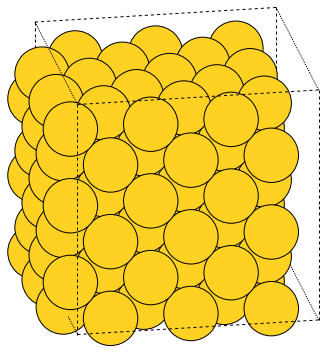

In [29]:
#Creating figure
from IPython.display import Image
from ase.io import write
from ase.build import bulk

gold_cubic = bulk('Au', 'fcc', a=4.08, cubic=True)

write('gold.png', gold_cubic.repeat((3, 3, 3)), rotation='10y,20x', show_unit_cell =2, )

Image(filename='gold.png') 

MovieWriter ffmpeg unavailable; using Pillow instead.


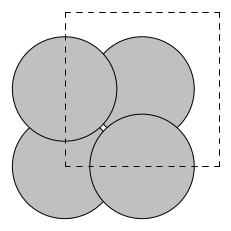

In [33]:
from ase.build import bulk
write('movie.gif', [bulk('Ag', 'fcc', a=a, cubic=True) for a in [4.08, 4.2, 4.3]], interval=500)


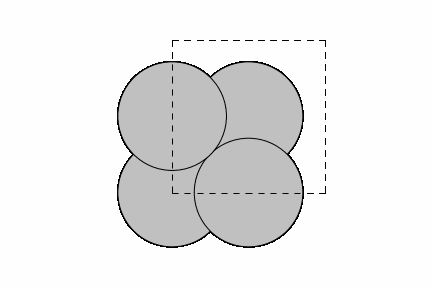

In [34]:
Image(filename='movie.gif') 

In [37]:
# building more complex structures
from ase.spacegroup import crystal
a = 4.6
c = 2.95

rutile = crystal( 
cellpar    = [a, a, c, 90 , 90 , 90],
symbols    = ['Ti', 'O'],
basis      = [(0 , 0, 0), (0.3 , 0.3 , 0.0)], 
spacegroup = 136 )
# view(rutile)
view(rutile*(2,2,2), viewer='x3d')
write('rutile.cif', rutile)
view(rutile, viewer='x3d')

In [40]:
#building slabs with adsorbate molecules on the surface
from ase import Atoms
from ase.build import fcc111, add_adsorbate, bulk
from ase.io import read, write

adsorbate = Atoms('CO')

adsorbate[1].z = 1.1
a = 3.61 # in Angstroms
slab = fcc111('Cu', (2, 2, 3), a=a, vacuum=7.0)
add_adsorbate(slab, adsorbate, 4.8, 'ontop')
write('slab.xyz', slab, vec_cell=True )
write('slab.png', slab * (3, 3, 1), rotation='10z,-80x')
#Image(filename='slab.png')
view(slab* (3, 3, 1), viewer='x3d')

# Calculators

In [41]:
from ase.calculators.emt import EMT
from ase.io import write
from IPython.display import Image

N2 = Atoms('2N', positions=[(0., 0., 0.), (0., 0., 5)])
N2.calc = EMT()
print('N2 bond length = {:.2f} A'.format(N2.get_all_distances()[0][1] ))
write('N2_init.png', N2, rotation='90y,90x', show_unit_cell =2, )
Image(filename='N2_init.png')

N2 bond length = 5.00 A


# Optimization

In [42]:
N2.get_forces()


array([[ 0.000,  0.000,  0.057],
       [ 0.000,  0.000, -0.057]])

In [43]:
from ase.optimize import QuasiNewton

dyn = QuasiNewton(N2, trajectory='N2.traj')
dyn.run(fmax=0.05) #forces in eV/A
print('N2 bond length = {:.2f} A'.format(N2.get_all_distances()[0][1] ))
write('N2_end.png', N2, rotation='90y,90x', show_unit_cell =2, )
Image(filename='N2_end.png')

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 09:29:54       10.167752*       0.0567
BFGSLineSearch:    1[  4] 09:29:54       10.113542*       0.1490
BFGSLineSearch:    2[ 10] 09:29:54        9.175010*       1.6097
BFGSLineSearch:    3[ 17] 09:29:54        0.262853*       0.0767
BFGSLineSearch:    4[ 19] 09:29:54        0.262777*       0.0042
N2 bond length = 1.00 A


In [44]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

from ase.calculators.emt import EMT # effective medium theory (EMT) calculator, as it is very fast and hence useful for getting started.

benz = molecule('C6H6')

benz.calc = EMT()

e = benz.get_potential_energy()

print('Potential energy is', e, 'eV')

start_positions = benz.get_positions()
benz.get_forces() # eV/A


Potential energy is 4.2359775070555274 eV


array([[-0.000, -4.342,  0.000],
       [-3.760, -2.171,  0.000],
       [-3.760,  2.171,  0.000],
       [-0.000,  4.342,  0.000],
       [ 3.760,  2.171,  0.000],
       [ 3.760, -2.171,  0.000],
       [ 0.000,  3.120,  0.000],
       [ 2.702,  1.560,  0.000],
       [ 2.702, -1.560,  0.000],
       [ 0.000, -3.120,  0.000],
       [-2.702, -1.560,  0.000],
       [-2.702,  1.560,  0.000]])

In [45]:
from ase.optimize import QuasiNewton
dyn = QuasiNewton(benz, trajectory='benz.traj')
dyn.run(fmax=0.05) #forces in eV/A
e = benz.get_potential_energy()
print('Potential energy is', e, 'eV')
#benz.get_forces() # eV/A

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 09:31:07        4.235978*       4.3421
BFGSLineSearch:    1[  2] 09:31:07        2.572785*       0.6423
BFGSLineSearch:    2[  4] 09:31:07        2.213573*       0.5039
BFGSLineSearch:    3[  5] 09:31:07        2.187580*       0.0770
BFGSLineSearch:    4[  6] 09:31:07        2.186319*       0.0047
Potential energy is 2.186318643340461 eV


In [46]:
end_positions = benz.get_positions()
print(start_positions-end_positions)

[[-0.000  0.191  0.000]
 [ 0.165  0.095  0.000]
 [ 0.165 -0.095  0.000]
 [-0.000 -0.191  0.000]
 [-0.165 -0.095  0.000]
 [-0.165  0.095  0.000]
 [-0.000  0.051  0.000]
 [ 0.044  0.026  0.000]
 [ 0.044 -0.026  0.000]
 [ 0.000 -0.051  0.000]
 [-0.044 -0.026  0.000]
 [-0.044  0.026  0.000]]


In [50]:
#Mopac 
from ase.calculators.mopac import MOPAC

'mopac_inout/molec_PM7_em.out'
atoms = molecule('C6H6')

calc = MOPAC(label='molec_PM7_em')
# atoms.calc = calc
calc.read('molec_PM7_em')



AssertionError: Not implemented